In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [6]:
df.drop(['index','Sex','Cholesterol','FBS over 120','EKG results','Max HR','ST depression'],axis=1,inplace=True)

In [7]:
df.columns

Index(['Age', 'Chest pain type', 'BP', 'Exercise angina', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [9]:
df['Heart Disease']= df['Heart Disease'].map({'Presence': 1, 'Absence':0})

In [10]:
df

,Age,Chest pain type,BP,Exercise angina,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,4,130,0,2,3,3,1
1,67,3,115,0,2,0,7,0
2,57,2,124,0,1,0,7,1
3,64,4,128,1,2,1,7,0
4,74,2,120,1,1,1,3,0
...,...,...,...,...,...,...,...,...
265,52,3,172,0,1,0,7,0
266,44,2,120,0,1,0,7,0
267,56,2,140,0,2,0,3,0
268,57,4,140,0,2,0,6,0


In [13]:
X = df[['Chest pain type','BP','Exercise angina','Slope of ST','Number of vessels fluro','Thallium','Heart Disease']]
y=df['Age']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [17]:
model = LR()

In [18]:
model.fit(X_train,y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [22]:
import seaborn as sns

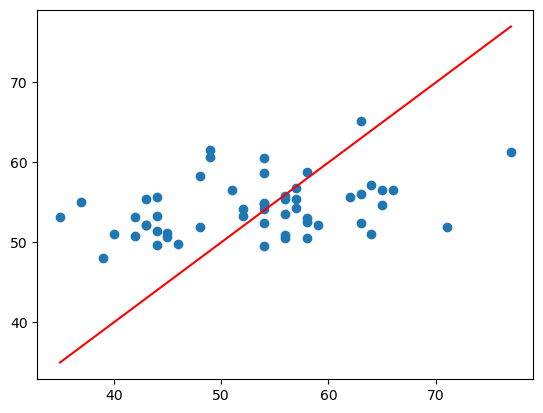

In [26]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)],color='red')

In [27]:
import statsmodels.api as sm


In [32]:
import statsmodels.api as sm

# Assuming X and y are your feature matrix and target variable
# Add a constant term to the feature matrix X
X = sm.add_constant(X)

# Create and fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     9.144
Date:                Fri, 10 May 2024   Prob (F-statistic):           4.14e-10
Time:                        18:41:52   Log-Likelihood:                -949.61
No. Observations:                 270   AIC:                             1915.
Df Residuals:                     262   BIC:                             1944.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     